<a href="https://colab.research.google.com/github/sanyam1992000/anime-faces-vs-human-faces/blob/master/prediction_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***To Do First***

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [11]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1"

--2020-08-01 16:36:50--  https://drive.google.com/uc?id=1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1
Resolving drive.google.com (drive.google.com)... 108.177.125.113, 108.177.125.139, 108.177.125.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a33oe290j9a3b36p84a36popqot0fvbe/1596299775000/02724203644354262509/*/1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1 [following]
--2020-08-01 16:36:54--  https://doc-0o-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a33oe290j9a3b36p84a36popqot0fvbe/1596299775000/02724203644354262509/*/1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1
Resolving doc-0o-as-docs.googleusercontent.com (doc-0o-as-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0o-as-docs.googleusercontent.com (doc-0o-as-docs.googleusercontent.com)|74

In [12]:
predictor = load_learner('/content')

In [13]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

# ***Predict by passing Images Url***

In [21]:
url = input("Enter URL")
!wget -O "sample.jpg" {url}

Enter URLhttps://i.pinimg.com/736x/2a/df/fb/2adffbee6e939b2bd1e32ffa8c763308.jpg
--2020-08-01 16:43:38--  https://i.pinimg.com/736x/2a/df/fb/2adffbee6e939b2bd1e32ffa8c763308.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:49a::1931, 2600:1417:76:482::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98993 (97K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  96.67K  --.-KB/s    in 0.007s  

2020-08-01 16:43:38 (14.0 MB/s) - ‘sample.jpg’ saved [98993/98993]



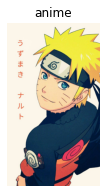

In [20]:
counter = 0
os.makedirs("output",exist_ok=True)
img = open_image('/content/sample.jpg')
title = str(my_predictor('/content/sample.jpg'))
img.show(title=title)
plt.savefig("output/output{}.jpg".format(counter))
counter += 1

# ***Predict by Uploading Images***

In [ ]:
from google.colab import files
my_file = files.upload()

Saving 75601406-352-k257678.jpg to 75601406-352-k257678.jpg
Saving Sara-Ali-Khan_16feb6f69a1_medium.jpg to Sara-Ali-Khan_16feb6f69a1_medium.jpg
Saving sara-ali-khan-1092139-19-04-2018-04-25-55.jpg to sara-ali-khan-1092139-19-04-2018-04-25-55.jpg
Saving n m.jpg to n m.jpg
Saving m.png to m.png
Saving index.jpeg to index.jpeg
Saving kushina.jpg to kushina.jpg
Saving sanyam.jpg to sanyam.jpg


In [ ]:
path = list(my_file.keys())
c = len(path)
os.makedirs("output",exist_ok=True)

counter = 0
for i in path:
  img = open_image(i)
  title = str(my_predictor(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Predict By Uploading Video***

In [26]:
import cv2, os
os.makedirs("output",exist_ok=True)
  
def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    count = 0
    success = 1
  
    while success: 
        success, image = vidObj.read() 
        try:
          cv2.imwrite("output/frame%d.jpg" % count, image) 
        except:
          return
        count += 1

In [23]:
from google.colab import files
my_file = files.upload()

Saving Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm to Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm


In [27]:
path = list(my_file.keys())
os.makedirs("output",exist_ok=True)

for i in path:
  FrameCapture(i)

In [ ]:
% time
path = os.listdir('/content/output')
counter = 0
os.makedirs("output",exist_ok=True)
path.sort(key = lambda x: (len(x),x))
path

In [ ]:
% time

for i in path[:100]:
  img = open_image('/content/output/'+ i)
  title = str(my_predictor('/content/output/'+ i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Output to Video***

In [ ]:
%cd "output"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

In [41]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [42]:
url = upload_public('my_final_output.mp4')
print(url)

https://drive.google.com/uc?id=10UAPzM02tLiK5nZHraP8-oXCkSTpOnDz


In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")